In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

import scipy as scp
import sklearn
import sys, os, pickle

sys.path.append(os.path.join('..'))

from FACT.helper import *
from FACT.fairness import *
from FACT.data_util import *
from FACT.plot import *
from FACT.lin_opt import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.model_selection import train_test_split

In [7]:
DATANAME='adult'
X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, dtypes, dtypes_, sens_idc, race_idx, sex_idx = get_dataset(DATANAME)

In [8]:
try:
    #grid_base =  pickle.load(open('model_adult_base.pkl', 'rb'))[0]
    grid =  pickle.load(open('model_adult.pkl', 'rb'))[0]
    #model_base = grid_base.best_estimator_.named_steps['logisticregression']
    model = grid.best_estimator_.named_steps['logisticregression']
except:
    model_names = ['LogisticRegression']
    result = create_and_train_models(model_names, dtypes_, X_train_removed, y_train, X_test=X_test_removed, y_test=y_test, save=True, data_name=DATANAME)
    #result_base = create_and_train_models(model_names, dtypes, X_train, y_train, X_test=X_test, y_test=y_test, save=True, data_name=DATANAME + '_base')
    #model_base = result_base[0]['estimator']
    model = result[0]['estimator']

Training {'model_name': 'LogisticRegression', 'estimator': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=array([False, False, False, False,  True,  True,  True,  True,  True,
        True]),
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)), ('standardscaler', StandardScaler(copy=True, with_me...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'logisticregression__C': array([0.0001, 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0), 'get_model': <function create_model.<locals>.get_model at 0x7f27b5d43840>}


In [9]:
# Get fairness matrix information
fm = FairnessMeasures(X_train, 
                      y_train, 
                      X_test, 
                      y_test, 
                      X_train_removed, 
                      X_test_removed, 
                      grid, 
                      sex_idx, 
                      pos_label=1, 
                      neg_label=0)

mats, mats_dict, M_const, b_const = get_fairness_mats(fm)

In [6]:
result = test_all_enumerations(fm, mats)

['EqOdd', 'Calibration']	False	None
['EqOdd', 'PosClassBal']	True	0.23686779050537868
['EqOdd', 'NegClassBal']	True	0.23687069783024092
['EqOdd', 'ClassBal']	True	0.23686779050537812
['EqOdd', 'PredEqual']	True	0.23687069783024065
['EqOdd', 'EqOpp']	True	0.23687069783024517
['EqOdd', 'DemoParity']	True	0.23686670012609065
['Calibration', 'PosClassBal']	False	None
['Calibration', 'NegClassBal']	False	None
['Calibration', 'ClassBal']	False	None
['Calibration', 'PredEqual']	False	None
['Calibration', 'EqOpp']	False	None
['Calibration', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal']	True	5.551115123125783e-16
['PosClassBal', 'ClassBal']	True	5.551115123125783e-16
['PosClassBal', 'PredEqual']	True	5.551115123125783e-16
['PosClassBal', 'EqOpp']	True	0.23686779050538145
['PosClassBal', 'DemoParity']	True	0.06537660169483518
['NegClassBal', 'ClassBal']	True	5.551115123125783e-16
['NegClassBal', 'PredEqual']	True	5.551115123125783e-16
['NegClassBal', 'EqOpp']	True	0.2368706978302413
['

['PosClassBal', 'NegClassBal', 'EqOpp', 'DemoParity']	True	0.2368683724261097
['PosClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.2368676148355797
['PosClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.2368676111753222
['PosClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.23686825100003317
['PosClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.23686826103477684
['NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.23686779050538365
['NegClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.2368661672278641
['NegClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.236851239057652
['NegClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.23686709510442455
['ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.23686794509843262
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'PredEqual']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'EqOpp']	False	None
['EqO

['EqOdd', 'Calibration', 'PosClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.2368683167134493
['Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None


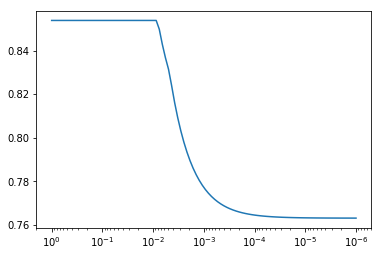

In [267]:
# Post process
A, b = mats_dict['EqOdd']
A_const = M_const


eps_vals = np.logspace(0, -6, 100)
eps_used = []
acc_vals = []
for eps in eps_vals:
    res, _ = model_spec_solve(A, b, A_const, b_const, fm, eps=eps)
    acc_vals.append(1 - res.value)
    eps_used.append(eps)
    
f, axs = plt.subplots()
axs.semilogx(eps_used, acc_vals)
axs.invert_xaxis()

import pickle
pickle.dump([eps_used, acc_vals], open('postprocess.pkl', 'wb'))

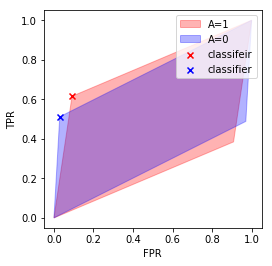

In [279]:
res = model_spec_solve(A, b, A_const, b_const, fm, eps=0.1 ,plot=True)

In [630]:
# Read csv files from EqODD results
eqodd_results = []
for i in range(10):
    eqodd_results.append(np.genfromtxt('adult_eqodd_result_trial%d.csv'%i, delimiter=','))
    
calib_eqodd_results_fnr = []
calib_eqodd_results_fpr = []
calib_eqodd_results_weighted = []
for i in range(10):
    calib_eqodd_results_fnr.append(np.genfromtxt('calib_eqodd_result_trial%d_fnr.csv'%i, delimiter=','))
    calib_eqodd_results_fpr.append(np.genfromtxt('calib_eqodd_result_trial%d_fpr.csv'%i, delimiter=','))
    calib_eqodd_results_weighted.append(np.genfromtxt('calib_eqodd_result_trial%d_weighted.csv'%i, delimiter=','))

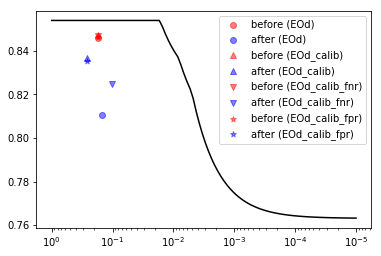

In [631]:
# Post process
A, b = mats_dict['EqOdd']
A_const = M_const

eps_vals = np.logspace(0, -5, 100)
eps_used = []
acc_vals = []
for eps in eps_vals:
    res, _ = model_spec_solve(A, b, A_const, b_const, fm, eps=eps)
    acc_vals.append(1 - res.value)
    eps_used.append(eps)
    
f, axs = plt.subplots()
axs.semilogx(eps_used, acc_vals, color='k')

# plot eqodds 
eqodd_points_before_x = [e[0][0] for e in eqodd_results]
eqodd_points_before_y = [e[0][1] for e in eqodd_results]
eqodd_points_after_x = [e[1][0] for e in eqodd_results]
eqodd_points_after_y = [e[1][1] for e in eqodd_results]
eqodd_points_before_x = [np.mean(eqodd_points_before_x)]
eqodd_points_before_y = [np.mean(eqodd_points_before_y)]
eqodd_points_after_x = [np.mean(eqodd_points_after_x)]
eqodd_points_after_y = [np.mean(eqodd_points_after_y)]

axs.scatter(eqodd_points_before_x, eqodd_points_before_y, label='before (EOd)', color='r', marker='o', alpha=0.5)
axs.scatter(eqodd_points_after_x, eqodd_points_after_y, label='after (EOd)', color='b', marker='o', alpha=0.5)

# plot calib eq odds
calib_eqodd_points_before_x = [e[0][0] for e in calib_eqodd_results_weighted]
calib_eqodd_points_before_y = [e[0][1] for e in calib_eqodd_results_weighted]
calib_eqodd_points_after_x = [e[1][0] for e in calib_eqodd_results_weighted]
calib_eqodd_points_after_y = [e[1][1] for e in calib_eqodd_results_weighted]
calib_eqodd_points_before_x = [np.mean(calib_eqodd_points_before_x)]
calib_eqodd_points_before_y = [np.mean(calib_eqodd_points_before_y)]
calib_eqodd_points_after_x = [np.mean(calib_eqodd_points_after_x)]
calib_eqodd_points_after_y = [np.mean(calib_eqodd_points_after_y)]

axs.scatter(calib_eqodd_points_before_x, calib_eqodd_points_before_y, label='before (EOd_calib)', color='r', marker='^', alpha=0.5)
axs.scatter(calib_eqodd_points_after_x, calib_eqodd_points_after_y, label='after (EOd_calib)', color='b', marker='^', alpha=0.5)

# plot calib eq odds fnr
calib_eqodd_points_before_x = [e[0][0] for e in calib_eqodd_results_fnr]
calib_eqodd_points_before_y = [e[0][1] for e in calib_eqodd_results_fnr]
calib_eqodd_points_after_x = [e[1][0] for e in calib_eqodd_results_fnr]
calib_eqodd_points_after_y = [e[1][1] for e in calib_eqodd_results_fnr]
calib_eqodd_points_before_x = [np.mean(calib_eqodd_points_before_x)]
calib_eqodd_points_before_y = [np.mean(calib_eqodd_points_before_y)]
calib_eqodd_points_after_x = [np.mean(calib_eqodd_points_after_x)]
calib_eqodd_points_after_y = [np.mean(calib_eqodd_points_after_y)]

axs.scatter(calib_eqodd_points_before_x, calib_eqodd_points_before_y, label='before (EOd_calib_fnr)', color='r', marker='v', alpha=0.5)
axs.scatter(calib_eqodd_points_after_x, calib_eqodd_points_after_y, label='after (EOd_calib_fnr)', color='b', marker='v', alpha=0.5)

# plot calib eq odds fpr
calib_eqodd_points_before_x = [e[0][0] for e in calib_eqodd_results_fpr]
calib_eqodd_points_before_y = [e[0][1] for e in calib_eqodd_results_fpr]
calib_eqodd_points_after_x = [e[1][0] for e in calib_eqodd_results_fpr]
calib_eqodd_points_after_y = [e[1][1] for e in calib_eqodd_results_fpr]
calib_eqodd_points_before_x = [np.mean(calib_eqodd_points_before_x)]
calib_eqodd_points_before_y = [np.mean(calib_eqodd_points_before_y)]
calib_eqodd_points_after_x = [np.mean(calib_eqodd_points_after_x)]
calib_eqodd_points_after_y = [np.mean(calib_eqodd_points_after_y)]

axs.scatter(calib_eqodd_points_before_x, calib_eqodd_points_before_y, label='before (EOd_calib_fpr)', color='r', marker='*', alpha=0.5)
axs.scatter(calib_eqodd_points_after_x, calib_eqodd_points_after_y, label='after (EOd_calib_fpr)', color='b', marker='*', alpha=0.5)

import pickle
pickle.dump([eps_used, acc_vals], open('postprocess_curve.pkl', 'wb'))

axs.invert_xaxis()
axs.legend()

In [636]:
# Post process
A, b = mats_dict['EqOdd']
A_const = M_const

eps_vals = np.logspace(0, -5, 100)
eps_used = []
acc_vals = []
for eps in eps_vals:
    res, _ = model_spec_solve(A, b, A_const, b_const, fm, eps=eps)
    acc_vals.append(1 - res.value)
    eps_used.append(eps)
    
eps_targets = [np.array(eps_used)[np.array(acc_vals) > 0.84][-1]]
#eps_targets = eps_used
fact_sol_eps = []
fact_sol_acc = []
for eps in eps_targets:
    res, sol = model_spec_solve(A, b, A_const, b_const, fm, eps=eps)
    if res.status == 'infeasible':
        print('early quit: %f'%eps)
        break
    #print(eps, 1- res.value)
    zz = sol.value
    # get mixing rates

    # base classifier
    fpr_base_pos = fm.pos_group_stats['FPR']
    tpr_base_pos = fm.pos_group_stats['TPR']
    fnr_base_pos = fm.pos_group_stats['FNR']
    tnr_base_pos = fm.pos_group_stats['TNR']
    fpr_base_neg = fm.neg_group_stats['FPR']
    tpr_base_neg = fm.neg_group_stats['TPR']
    fnr_base_neg = fm.neg_group_stats['FNR']
    tnr_base_neg = fm.neg_group_stats['TNR']

    # derived classifier
    fpr_der_pos = zz[2] / (zz[2] + zz[3])
    tpr_der_pos = zz[0] / (zz[0] + zz[1])
    fnr_der_pos = 1 - tpr_der_pos
    tnr_der_pos = 1 - fpr_der_pos
    fpr_der_neg = zz[6] / (zz[6] + zz[7])
    tpr_der_neg = zz[4] / (zz[4] + zz[5])
    fnr_der_neg = 1 - tpr_der_neg
    tnr_der_neg = 1 - fpr_der_neg
    
    for i in range(10):

        # get mixing rates
        mix_mat_pos = np.array([[tpr_base_pos, fnr_base_pos, 0, 0], [fpr_base_pos, tnr_base_pos, 0, 0], [0, 0, tpr_base_pos, fnr_base_pos], [0, 0, fpr_base_pos, tnr_base_pos]])
        mix_b_pos = np.array([tpr_der_pos, fpr_der_pos, fnr_der_pos, tnr_der_pos])
        mix_sol_pos = np.linalg.solve(mix_mat_pos, mix_b_pos)
        mix_mat_neg = np.array([[tpr_base_neg, fnr_base_neg, 0, 0], [fpr_base_neg, tnr_base_neg, 0, 0], [0, 0, tpr_base_neg, fnr_base_neg], [0, 0, fpr_base_neg, tnr_base_neg]])
        mix_b_neg = np.array([tpr_der_neg, fpr_der_neg, fnr_der_neg, tnr_der_neg])
        mix_sol_neg = np.linalg.solve(mix_mat_neg, mix_b_neg)
        p2p_pos, n2p_pos, p2n_pos, n2n_pos = mix_sol_pos
        p2p_neg, n2p_neg, p2n_neg, n2n_neg = mix_sol_neg

        # Post-process accordingly
        pos_pred = fm.y_pred[fm.pos_group]
        pos_pred_fair = pos_pred.copy()
        pos_pp_indices, = np.nonzero(pos_pred)
        pos_pn_indices, = np.nonzero(1 - pos_pred)
        np.random.seed(i)
        np.random.shuffle(pos_pp_indices)
        np.random.seed(i)
        np.random.shuffle(pos_pn_indices)
        n2p_indices = pos_pn_indices[:int(len(pos_pn_indices) * n2p_pos)]
        pos_pred_fair[n2p_indices] = 1 - pos_pred_fair[n2p_indices]
        p2n_indices = pos_pp_indices[:int(len(pos_pp_indices) * (1 - p2p_pos))]
        pos_pred_fair[p2n_indices] = 1 - pos_pred_fair[p2n_indices]

        neg_pred = fm.y_pred[fm.neg_group]
        neg_pred_fair = neg_pred.copy()
        neg_pp_indices, = np.nonzero(neg_pred)
        neg_pn_indices, = np.nonzero(1 - neg_pred)
        np.random.shuffle(neg_pp_indices)
        np.random.shuffle(neg_pn_indices)
        n2p_indices = neg_pn_indices[:int(len(neg_pn_indices) * n2p_neg)]
        neg_pred_fair[n2p_indices] = 1 - neg_pred_fair[n2p_indices]
        p2n_indices = neg_pp_indices[:int(len(neg_pp_indices) * (1 - p2p_neg))]
        neg_pred_fair[p2n_indices] = 1 - neg_pred_fair[p2n_indices]

        # Measure performance

        # EOd gap and accuracy
        fn_pos = np.where(pos_pred_fair - fm.y_test[fm.pos_group] == -1)[0].shape[0]
        fp_pos = np.where(pos_pred_fair - fm.y_test[fm.pos_group] == 1)[0].shape[0]
        eod_pos = (fn_pos / fm.pos_group_num, fp_pos / fm.pos_group_num)

        fn_neg = np.where(neg_pred_fair - fm.y_test[fm.neg_group] == -1)[0].shape[0]
        fp_neg = np.where(neg_pred_fair - fm.y_test[fm.neg_group] == 1)[0].shape[0]
        eod_neg = (fn_neg / fm.neg_group_num, fp_neg / fm.neg_group_num)

        eod_gap = np.abs(eod_pos[0] - eod_neg[0]) + np.abs(eod_pos[1] - eod_neg[1])
        acc = 1 - (fn_pos + fp_pos + fn_neg + fp_neg) / fm.y_test.shape[0] 
        print(eod_gap, acc)
        fact_sol_eps.append(eod_gap)
        fact_sol_acc.append(acc)

0.06919340071379061 0.8428703040229297
0.06857573548834281 0.8426655747773569
0.06811610403899716 0.8420513870406388
0.06811610403899718 0.8422561162862114
0.06811610403899718 0.8424608455317842
0.06811610403899718 0.8418466577950661
0.06811610403899716 0.8420513870406388
0.06811610403899718 0.8418466577950661
0.06811610403899718 0.8422561162862114
0.06811610403899719 0.8416419285494933


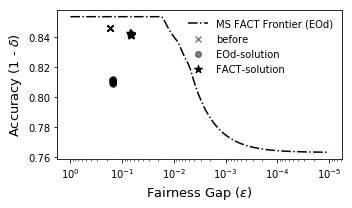

In [637]:
A_eod, b_eod = mats_dict['EqOdd']
A_cg, b_cg = mats_dict['Calibration']
A_dp, b_dp = mats_dict['DemoParity']
A_const = M_const

A1, b1 = A_eod, b_eod 
A2, b2 = np.vstack((A_eod, A_cg)), np.vstack((b_eod, b_cg))
A3, b3 = np.vstack((A_eod, A_dp)), np.vstack((b_eod, b_dp))

lst_mat = [(A1, b1)]
color = ['k']
name = ['EOd']

f, axs = plt.subplots(figsize=(5,3))
for i, (A, b) in enumerate(lst_mat):
    eps_vals = np.logspace(0, -5, 100)
    eps_used = []
    acc_vals = []
    failed_point = None
    for eps in eps_vals:
        res, _ = model_spec_solve(A, b, A_const, b_const, fm, eps=eps)
        if res.status != 'infeasible':
            acc_vals.append(1 - res.value)
            eps_used.append(eps)
        else:
            failed_point = eps
            break
    axs.semilogx(eps_used, acc_vals, color=color[i], linestyle='-.', label='MS FACT Frontier (%s)'%name[i])
    if failed_point != None:
        axs.scatter([failed_point], [acc_vals[-1]], marker='X', color=color[i], s=100, label='incompatible')

eqodd_points_before_x = [e[0][0] for e in eqodd_results]
eqodd_points_before_y = [e[0][1] for e in eqodd_results]
eqodd_points_after_x = [e[1][0] for e in eqodd_results]
eqodd_points_after_y = [e[1][1] for e in eqodd_results]
axs.scatter(eqodd_points_before_x, eqodd_points_before_y, label='before', color='k', marker='x', alpha=0.5)
axs.scatter(eqodd_points_after_x, eqodd_points_after_y, label='EOd-solution', color='k', marker='o', alpha=0.5)
axs.scatter(fact_sol_eps, fact_sol_acc, label='FACT-solution', color = 'k', marker='*', s=70)

# pickle.dump([eps_used, acc_vals], open('postprocess_curve_cg.pkl', 'wb'))
axs.invert_xaxis()
axs.legend(frameon=False)
axs.set_ylabel('Accuracy (1 - $\delta$)', fontsize=13)
axs.set_xlabel('Fairness Gap ($\epsilon$)', fontsize=13)
plt.tight_layout()
plt.savefig('post.pdf', bbox_inches='tight', dpi=200)